In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2112000)

In [9]:
# Images are generated in batches of 10. Endings 0 - 5 are training set,
# 6 - 7 are validation set, 8 - 9 are test set.

# PATH_BASE = '../RAVEN_DS/RAVEN-F/'
# PATH_BASE = '../RAVEN_DS/RAVEN/'

PATH_BASE = '/Users/johannes/Documents/COCO_RAVEN/RAVEN-F/'

TYPE = {
    'center' : 'center_single',
    '2x2' : 'distribute_four',
    '3x3' : 'distribute_nine',
    'contains_single' : 'in_center_single_out_center_single',
    'contains_grid' : 'in_distribute_four_out_center_single',
    'lr' : 'left_center_single_right_center_single',
    'tb' : 'up_center_single_down_center_single'
}

TYPES = ['center', '2x2', '3x3', 'contains_single', 'contains_grid', 'lr', 'tb']

In [10]:
def pick_image(
        type : str = 'center',
        n : int = 0,
        random : bool = False,
        debug : bool = True
):
    '''
    Picks an Image based on the constants defined above and returns the file path.
    
    If `random=True`, picks random image and prints the selected parameters to stdout.

    If no parameters are given, returns the file path of center-0.
    '''
    if random:
        type = np.random.choice(TYPES)
        n = np.random.randint(0, 10000)
        if debug: print(f'Chosen Image: {type}-{n}.')

    suffix = '.npz'
    
    return PATH_BASE + TYPE[type] + '/RAVEN_' + str(n) + suffix


def show_matrix(
        file : np.lib.npyio.NpzFile
):
    '''
    Takes a loaded NpzFile and arranges the stimulus images in a matrix missing the [2][2] cell.
    '''
    fig, axs = plt.subplots(3, 3)                           # Create grid
    for image_id in range(8):                               # Matrix stimulus has 8 images
        row = image_id // 3
        col = image_id % 3                                  # Locate position for image
        ax = axs[row][col]
        ax.imshow(file['image'][image_id], cmap = 'gray')   # Set image on position
        ax.yaxis.set_visible(False)
        ax.xaxis.set_visible(False)                         # Remove axis labels
    axs[2][2].remove()                                      # Remove empty 9th image slot.
    plt.show()

def show_aopt(
        file: np.lib.npyio.NpzFile
):
    '''
    Takes a loaded NpzFile and arranges the anser options in a 2x4 grid.
    '''
    fig_opt, axs_opt = plt.subplots(2, 4)
    for image_id in range(8, 16):
        img = file['image'][image_id]                       # Pick image
        image_id -= 8                                       # Then reduce image_id to function as locator
        row = image_id // 4
        col = image_id % 4                                  # Locate position for image
        ax = axs_opt[row][col]
        ax.imshow(img, cmap = 'gray')                       # Set image on position
        ax.yaxis.set_visible(False)
        ax.xaxis.set_visible(False)                         # Remove axis labels
    plt.show()


with np.load(pick_image()) as file:
    # print(file)
    print(file.files)
    # for key in file.files:
        # print(file[key])

['image', 'target', 'predict', 'meta_matrix', 'meta_target', 'structure', 'meta_structure']


### What to make of `file['image']`

Chosen Image: tb-2771.


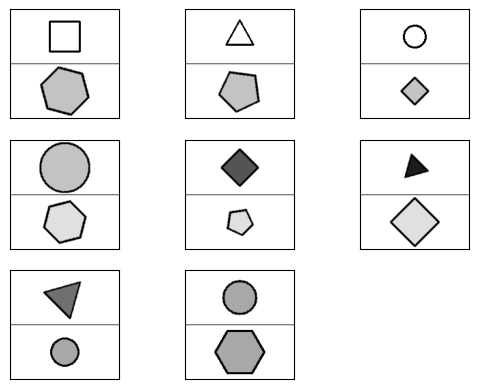

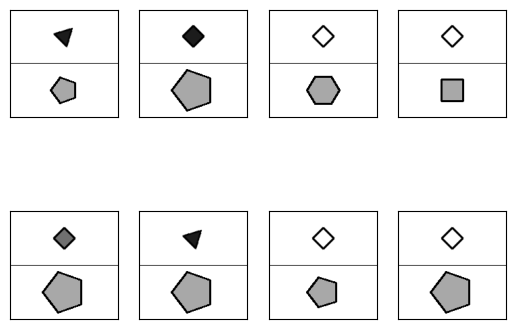

target: 2
predict: [1]


In [11]:
with np.load(pick_image(random=True)) as file:
    show_matrix(file)

    show_aopt(file)    

    print(f'target: {file["target"] + 1}')                  # Target is Index, this makes it easier to understand
    print(f'predict: {file["predict"]}')                    # Since predict[0] == target, this shows the original

In [12]:
while True:
    with np.load(pick_image(random=True)) as file:
        try:
            assert file['target'] in range(1, 8), 'target outside range!'
        except AssertionError as msg:
            print(msg)
            print(f'Target was: {file["target"]}')
            break

# -> The Target is a standard index ranging from 0 to 7.
        

Chosen Image: 3x3-9296.
Chosen Image: contains_grid-3526.
Chosen Image: contains_single-3973.
Chosen Image: tb-7024.
Chosen Image: contains_grid-3026.
Chosen Image: 2x2-3146.
Chosen Image: center-9619.
Chosen Image: center-727.
Chosen Image: 3x3-8479.
Chosen Image: contains_single-3469.
Chosen Image: contains_grid-7380.
Chosen Image: contains_single-1095.
Chosen Image: contains_grid-1974.
target outside range!
Target was: 0


## Are there usable annotations already in the dataset?

In [13]:
import xmltodict
from pprint import pprint

def get_xml(path : str):
    '''
    Get corresponding xml file for `.npz` archive.
    
    PARAMETERS
    ----------
    path : file path ending in `.npz`

    RETURNS
    -------
    xml : dict
    '''
    xml_path = path[:-4] + '.xml'

    with open(xml_path, 'r') as file:
        xml_file = file.read()
    
    dict = xmltodict.parse(xml_file)

    return dict

Chosen Image: tb-120.


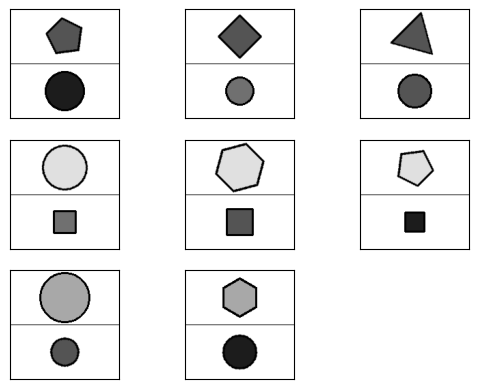

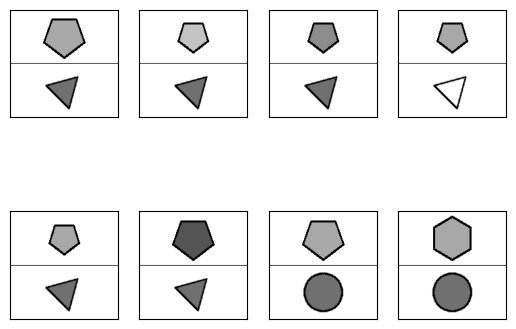

In [14]:
image_path = pick_image(random=True)
with np.load(image_path) as file:
    show_matrix(file)
    show_aopt(file)

In [15]:
with np.load(image_path) as file:
    print(file['image'][0].shape)

instance = get_xml(image_path)

panel = instance['Data']['Panels']['Panel'][0]  # Loop over the first 8 panels
struct = panel['Struct']
print(struct.keys())
# comp = struct['Component'][1]               # Loop over all components
# print(comp.keys())
# comp['Layout']['Entity']                    # Loop over Entity for @real_bbox and @mask
comp = struct['Component']
comp

(160, 160)
dict_keys(['@name', 'Component'])


[{'@id': '0',
  '@name': 'Up',
  'Layout': {'@name': 'Up_Center_Single',
   '@Number': '0',
   '@Position': '[[0.25, 0.5, 0.5, 0.5]]',
   '@Uniformity': '0',
   'Entity': {'@bbox': '[0.25, 0.5, 0.5, 0.5]',
    '@real_bbox': '[0.2412, 0.4912, 0.3369, 0.3369]',
    '@mask': "{'counts': [8515, 3, 156, 6, 153, 9, 150, 11, 148, 15, 144, 18, 141, 20, 1, 1, 137, 24, 135, 27, 132, 29, 130, 32, 127, 36, 123, 39, 120, 41, 1, 1, 116, 45, 114, 45, 114, 47, 112, 47, 112, 48, 111, 49, 110, 50, 109, 51, 108, 51, 109, 51, 109, 51, 110, 50, 110, 50, 111, 48, 112, 49, 112, 48, 113, 46, 114, 46, 114, 47, 114, 45, 115, 45, 116, 44, 117, 43, 116, 44, 117, 42, 119, 41, 119, 41, 120, 40, 121, 39, 121, 38, 123, 38, 122, 37, 123, 37, 124, 37, 123, 31, 1, 1, 2, 1, 125, 25, 136, 13, 1, 2, 2, 1, 140, 9, 152, 1, 1, 1, 8770], 'size': [160, 160]}",
    '@Type': '3',
    '@Size': '3',
    '@Color': '6',
    '@Angle': '0'}}},
 {'@id': '1',
  '@name': 'Down',
  'Layout': {'@name': 'Down_Center_Single',
   '@Number': '0

Chosen Image: lr-7519.


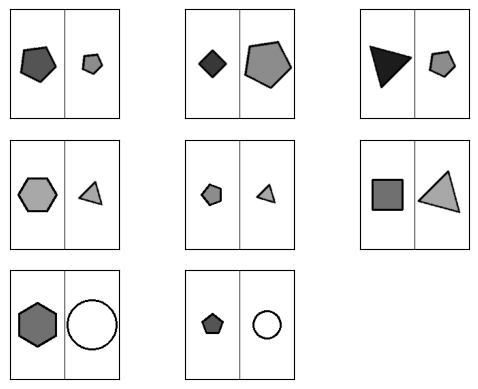

Panel 1
    Component 1: Left
        Entity:
            Mask: {'counts': [2491, 1, 1, 1, 152, 9, 140, 1, 2, 2, 1, 13, 136, 25, 125, 1, 2, 1, 1, 31, 123, 37, 124, 37, 123, 37, 122, 38, 123, 38, 121, 39, 121, 40, 120, 41, 119, 41, 119, 42, 117, 44, 116, 43, 117, 44, 116, 45, 115, 45, 114, 47, 114, 46, 114, 46, 113, 48, 112, 49, 112, 48, 111, 50, 110, 50, 110, 51, 109, 51, 109, 51, 108, 51, 109, 50, 110, 49, 111, 48, 112, 47, 112, 47, 114, 45, 114, 45, 116, 1, 1, 41, 120, 39, 123, 36, 127, 32, 130, 29, 132, 27, 135, 24, 137, 1, 1, 20, 141, 18, 144, 15, 148, 11, 150, 9, 153, 6, 156, 3, 14794], 'size': [160, 160]}
            Measured Bounding Box: [0.5088, 0.2588, 0.3369, 0.3369]
    Component 2: Right
        Entity:
            Mask: {'counts': [17040, 1, 5, 3, 145, 2, 2, 11, 139, 22, 138, 22, 138, 22, 138, 23, 137, 23, 137, 24, 135, 26, 134, 26, 135, 25, 135, 25, 134, 27, 133, 28, 131, 29, 132, 29, 131, 28, 132, 29, 131, 28, 132, 27, 132, 27, 133, 26, 134, 25, 137, 22, 141, 18, 144, 1

In [16]:
# Task:
# For a matrix, get all Objects with mask and bounding box
##########################################################

image_path = pick_image(random=True)

with np.load(image_path) as file:
    show_matrix(file)

instance = get_xml(image_path)

# Get only Panels
panels = instance['Data']['Panels']['Panel']
matrix_panels = panels[:8]

PAD = '    '
indent = ''

for i, panel in enumerate(matrix_panels):
    print(f'{indent}Panel {i + 1}')
    comps = panel['Struct']['Component']

    indent += PAD
    if type(comps) == list:
        for j, comp in enumerate(comps):
            print(f'{indent}Component {j + 1}: {comp["@name"]}')
            entities = comp['Layout']['Entity']
            
            indent += PAD
            if type(entities) == list:
                for k, entity in enumerate(entities):
                    print(f'{indent}Entity {k +1}')
                    indent += PAD
                    print(f'{indent}Mask: {entity["@mask"]}')
                    print(f'{indent}Measured Bounding Box: {entity["@real_bbox"]}')
                    indent = indent[:-4]

            else:
                entity = entities
                print(f'{indent}Entity:')
                indent += PAD
                print(f'{indent}Mask: {entity["@mask"]}')
                print(f'{indent}Measured Bounding Box: {entity["@real_bbox"]}')
                indent = indent[:-4]
            indent = indent[:-4]

    else:
        comp = comps
        print(f'{indent}Component: {comp["@name"]}')
        entities = comp['Layout']['Entity']
        
        indent += PAD
        if type(entities) == list:
            for k, entity in enumerate(entities):
                print(f'{indent}Entity {k +1}')
                indent += PAD
                print(f'{indent}Mask: {entity["@mask"]}')
                print(f'{indent}Measured Bounding Box: {entity["@real_bbox"]}')
                indent = indent[:-4]

        else:
            entity = entities
            print(f'{indent}Entity:')
            indent += PAD
            print(f'{indent}Mask: {entity["@mask"]}')
            print(f'{indent}Measured Bounding Box: {entity["@real_bbox"]}')
            indent = indent[:-4]
        indent = indent[:-4]
    indent = indent[:-4]

In [17]:
padding = '   .'
string = padding
string += padding
string += padding
string = string[:-4]
string = string[:-4]

string

'   .'